### Decision Tree

<img src="https://github.com/awantik/PythonDataScienceHandbook/raw/f2c4a8af3f6e7e5f455469839e31b09ab6c22868/notebooks/figures/05.08-decision-tree.png">

* Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
* Decision TRee generates model, which is like questions & help getting data classified
* Non-parametric model, takes 

In [31]:
#Only for generating data
from sklearn.datasets import make_blobs

In [32]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a

In [33]:
x,y = make_blobs(n_samples=300, centers=4, n_features=2,random_state=0, cluster_std=1.0)


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

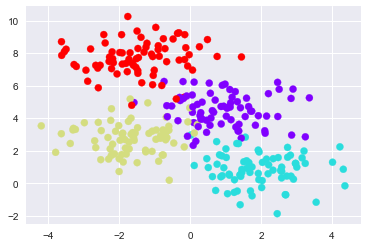

In [35]:
plt.scatter(x[:,0], x[:,1], c=y, s=50,cmap='rainbow')

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x,y)

In [37]:
x_test,y_test = make_blobs(n_samples=30000, centers=4, n_features=2,random_state=0, cluster_std=2.0)


In [38]:
y_pred = tree.predict(x_test)

In [39]:
y_pred

array([3, 2, 0, ..., 3, 3, 1])

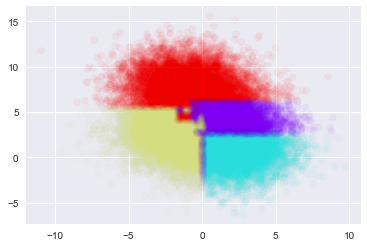

In [40]:

plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, s=50,cmap='rainbow', alpha=0.05)

In [61]:
tree.predict([[10.0,0]])

array([1])

In [62]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

* It is very easy to go too deep in the tree causing over-fitting

### Random Forest
* multiple overfitting estimators (decison trees) can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. 
* Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. 
* An ensemble of randomized decision trees is known as a random forest.

In [42]:

from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['target_names', 'target', 'DESCR', 'data', 'images'])

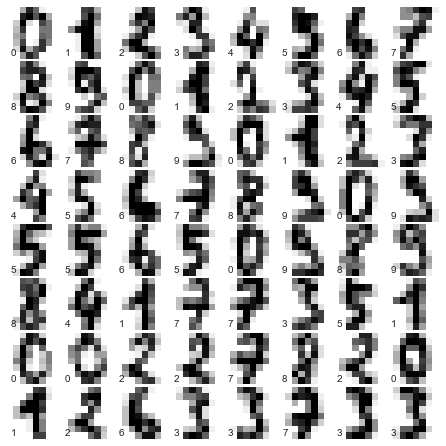

In [43]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [44]:
digits.data[0].reshape((8,8))

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [45]:
digits.data.shape

(1797, 64)

In [46]:
#Split data into train & test sets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

In [47]:
Xtrain.shape

(1347, 64)

In [48]:
Xtest.shape

(450, 64)

In [49]:
#help(train_test_split)

In [50]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators - Num of decison trees
model = RandomForestClassifier(n_estimators=1000)

In [51]:
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [52]:
ypred = model.predict(Xtest)

In [53]:
from sklearn import metrics

In [54]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.96      0.98        45
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.96      0.98      0.97        47
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.96      0.97        48

avg / total       0.98      0.98      0.98       450



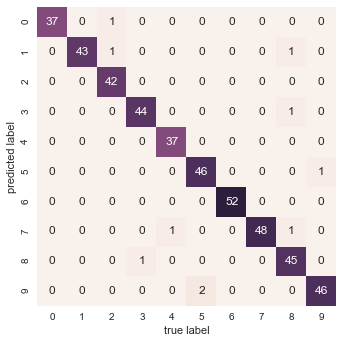

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
model.predict([Xtest[0]])

array([2])

In [57]:
Xtest[0].reshape((8,8))

array([[  0.,   0.,  11.,  16.,  15.,   3.,   0.,   0.],
       [  0.,   5.,  16.,  12.,  11.,  13.,   0.,   0.],
       [  0.,   3.,  13.,   1.,   5.,  15.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  12.,  11.,   0.,   0.],
       [  0.,   0.,   0.,   1.,  16.,   7.,   0.,   0.],
       [  0.,   0.,   0.,  10.,  15.,   0.,   0.,   0.],
       [  0.,   0.,  12.,  16.,  16.,  11.,   1.,   0.],
       [  0.,   0.,  13.,  13.,   8.,  13.,  16.,   8.]])

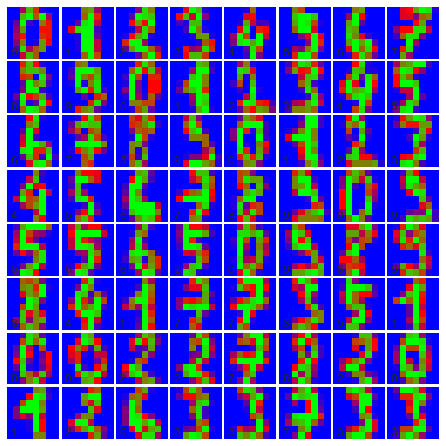

In [58]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.brg, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Summary of Random Forests
* Based on concept of ensamble estimators
* Both training & prediction are fast because they can be parallelized
* non-parametric can be extremely flexible